## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code three helper methods:

* random array generator
* array printer
* copyArray

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [3]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

// reverse an array
public void reverse(int[] arr) {
    int s = 0, e = arr.length-1;
    int temp;
    while (s < e) {
        temp = arr[s];
        arr[s] = arr[e];
        arr[e] = temp;
        
        s++;
        e--;
    }
}

## Insertion Sort

Let's implement an insertion sort that only works with integers.

In [4]:
public void insertionSort(int[] arr) {
    for (int i = 1; i < arr.length; i++) {
        int key = arr[i];
        
        int j = i - 1;
        while (j >= 0 && arr[j] > key) {
            arr[j+1] = arr[j];
            j--;
        }
        
        arr[j+1] = key;
    }
}

// sanity check
int[] arr = randomArr(5);
System.out.print("Given: ");
printArr(arr);
insertionSort(arr);
System.out.print("Sorted: ");
printArr(arr);

Given: 108 28 391 896 346 
Sorted: 28 108 346 391 896 


Let's modify insertion sort to keep track of its time complexity.

In [5]:
public int insertionSortTrack(int[] arr) {
    int steps = 0;

    for (int i = 1; i < arr.length; i++) {
        int key = arr[i];
        
        int j = i - 1;
        while (j >= 0 && arr[j] > key) {
            arr[j+1] = arr[j];
            j--;
            
            steps += 2;
        }
        
        arr[j+1] = key;
        
        steps += 5;
    }
    
    return steps;
}

Now lets plot the time complexity of Insertion Sort, including its worst, best and average scenarios.

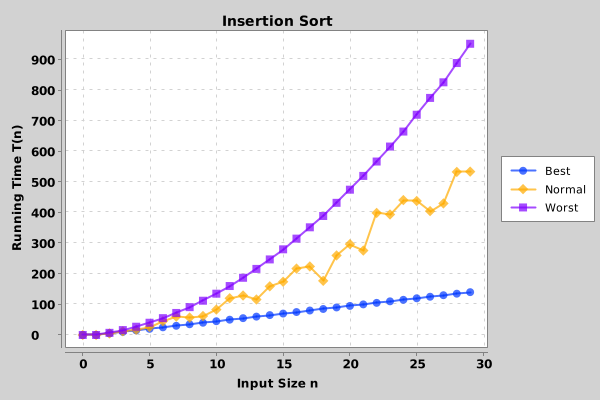

In [6]:
// predetermined size
int size = 30;

// storage of steps
int[] best = new int[size];
int[] normal = new int[size];
int[] worst = new int[size];

// populate storage
for (int i = 1; i < size; i++) {
    // normal
    int[] tempB = randomArr(i);
    int[] tempN = new int[tempB.length];
    copyArray(tempB, tempN);
    
    // best
    Arrays.sort(tempB);
    
    // worst
    int[] tempW = new int[tempB.length];
    copyArray(tempB, tempW);
    reverse(tempW);
    
    best[i] = insertionSortTrack(tempB);
    normal[i] = insertionSortTrack(tempN);
    worst[i] = insertionSortTrack(tempW);
}

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// best - convert int to double for plotting
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = best[i];
}

// normal - convert int to double for plotting
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = normal[i];
}

// worst - convert int to double for plotting
double[] yDataW = new double[size];
for (int i = 0; i < yDataW.length; i++) {
    yDataW[i] = worst[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Insertion Sort").xAxisTitle("Input Size n").yAxisTitle("Running Time T(n)").build();
chart.addSeries("Best", xData, yDataB);
chart.addSeries("Normal", xData, yDataN);
chart.addSeries("Worst", xData, yDataW);
BitmapEncoder.getBufferedImage(chart);

## Do It Yourself

#### Practice - sort a linked list
Given a singly linked list with all elements as integers, sort it using insertion sort.

A linked listnode is defined for you. The solution that is covered in class can also be found below.

Please also indicate the best, average and worst time complexity of your own solution. You may want to lay out some basic reasoning for your answers (*maybe with a plot*).

In [7]:
public class ListNode {
    int val;
    ListNode next;
    ListNode(int data) {
        val = data;
    }
}

In [8]:
public ListNode insertLSort(ListNode head) {
    // your code goes here
    // remove this line
    return ListNode(-1);
}

**<span style="color:red">Can you also test your solution?</span>**

**When you finish (or not) playing your exploration of the whole interactive notebook and DIY assignment, you should download a html file and upload it to the assignment box on Canvas:**

* File --> Download as --> HTML (.html)

![download](images/html.png)